# Iterative RAG: Enhancing Retrieval through Multi-Step Processes





Iterative RAG is an advanced framework that improves the retrieval process by performing multiple retrieval steps, refining its search based on feedback from previously selected documents. This iterative approach allows the system to adjust its retrieval strategy dynamically, enhancing the accuracy and relevance of the information retrieved. By following a Markov decision process for retrieval decisions, and utilizing reinforcement learning, Iterative RAG optimizes performance across various tasks.



## Key Features of Iterative RAG



- **Multi-Step Retrieval**: Unlike traditional single-step retrieval methods, Iterative RAG employs a multi-step process that allows for continuous refinement of the search results.

- **Feedback Mechanism**: The system incorporates feedback from previously retrieved documents to inform future retrieval decisions, ensuring that the most relevant information is prioritized.

- **Markov Decision Process**: Retrieval decisions are modeled as a Markov decision process, allowing the system to consider the current state and previous actions when determining the next retrieval step.

- **Reinforcement Learning Integration**: The use of reinforcement learning techniques enhances retrieval performance by optimizing strategies based on accumulated rewards from successful information retrieval.

- **Internal State Maintenance**: The iterative retriever maintains an internal state that accumulates knowledge from previous iterations, allowing it to adjust future retrieval steps effectively.


## How Iterative RAG Works



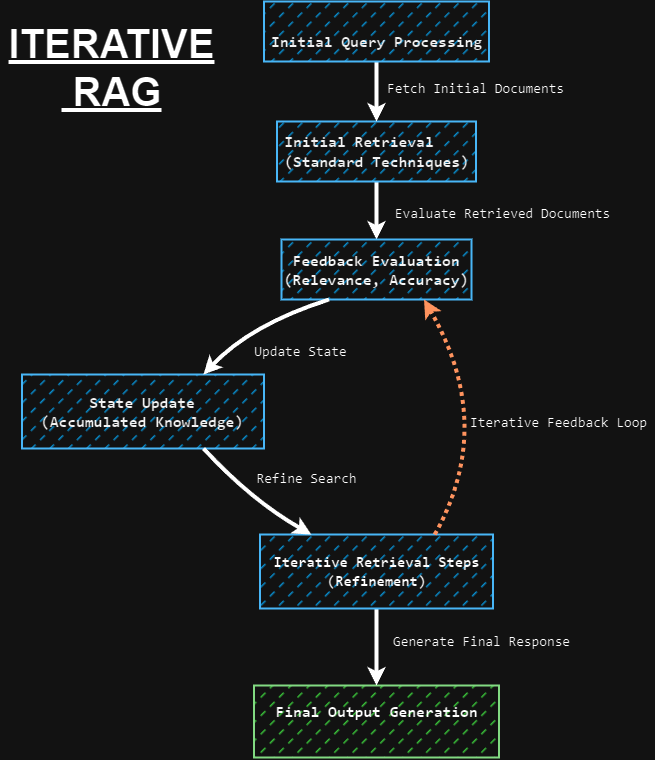

1. **Initial Query Processing**:
   - When a query is received, the system begins with an initial retrieval step, fetching relevant documents based on standard retrieval techniques.

2. **Feedback Evaluation**:
   - After retrieving initial documents, the system evaluates their relevance and accuracy based on predefined criteria or user feedback.
   - This evaluation informs adjustments for subsequent iterations.

3. **State Update**:
   - The internal state is updated with information from the retrieved documents and any feedback received.
   - This accumulated knowledge helps guide future retrieval steps.

4. **Iterative Retrieval Steps**:
   - The system performs additional retrieval steps based on its current state and previous actions.
   - Each iteration refines the search by focusing on more relevant documents or adjusting query parameters as needed.

5. **Final Output Generation**:
   - After completing the iterative process, the model generates a final response that integrates insights from all retrieved documents.
   - This output aims to provide a comprehensive and accurate answer to the original query.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from groq import Groq

# Step 0: Initialize the Groq Client
client = Groq(api_key="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")

# Step 1: Load PDF and Extract Text
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"
pdf_path = "BERT_paper.pdf"

response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

reader = PdfReader(pdf_path)
text = "".join(page.extract_text() for page in reader.pages)

# Step 2: Divide Text into Segments
segment_size = 1200
segments = [text[i:i + segment_size] for i in range(0, len(text), segment_size)]
print(f"Number of segments created: {len(segments)}")

# Step 3: Convert Segments into Semantic Embeddings
vectorizer = TfidfVectorizer()
segment_embeddings = vectorizer.fit_transform(segments)

def retrieve_top_segments(query, embeddings, segments, top_k=5):
    """Retrieve top-k relevant segments based on query."""
    query_embedding = vectorizer.transform([query])
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = similarities.argsort()[-top_k:][::-1]
    return [segments[i] for i in top_indices], similarities[top_indices]

# Step 4: Iterative RAG Workflow
query = "What is BERT architecture?"
iterations = 3
context = ""  # Initial empty context

for iteration in range(iterations):
    print(f"\n--- Iteration {iteration + 1} ---")

    # Retrieve top segments
    retrieved_segments, similarities = retrieve_top_segments(query, segment_embeddings, segments)

    print("Top Retrieved Segments:")
    for i, segment in enumerate(retrieved_segments):
        print(f"\nSegment {i + 1} (Score: {similarities[i]:.4f}):\n{segment[:150]}...")

    # Combine retrieved segments with context for Groq query
    combined_context = "\n".join(retrieved_segments) if not context else context + "\n" + "\n".join(retrieved_segments)

    # Generate response using Groq
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a refined retrieval assistant."},
                {"role": "user", "content": f"Answer the query based on the following context:\n\n{combined_context}\n\nQuery: {query}"},
            ],
            model="llama3-8b-8192",
        ).choices[0].message.content

        print("\nGenerated Response:")
        print(response)

        # Update context with the generated response for the next iteration
        context = response

        # Optionally refine the query
        query = f"Refine: {query}"  # You can adjust how queries are refined per iteration

    except Exception as e:
        print(f"Error during response generation: {e}")
        break

# Step 5: Final Output
print("\n--- Final Context ---")
print(context)

Number of segments created: 54

--- Iteration 1 ---
Top Retrieved Segments:

Segment 1 (Score: 0.1707):
e.
Model Architecture BERT’s model architec-
ture is a multi-layer bidirectional Transformer en-
coder based on the original implementation de-
scribe...

Segment 2 (Score: 0.1515):
tioned in passing that increasing hidden dimen-
sion size from 200 to 600 helped, but increasing
further to 1,000 did not bring further improve-
ments...

Segment 3 (Score: 0.1377):
BERT: Pre-training of Deep Bidirectional Transformers for
Language Understanding
Jacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova
Google AI L...

Segment 4 (Score: 0.1224):
ifferences, BERT and OpenAI GPT are ﬁne-
tuning approaches, while ELMo is a feature-based
approach.
The most comparable existing pre-training
method t...

Segment 5 (Score: 0.1133):
F1 scores are reported for QQP and MRPC, Spearman correlations are reported for STS-B, and
accuracy scores are reported for the other tasks. We exclud...

Generated Res

In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from groq import Groq

In [ ]:
# Step 0: Initialize the Groq Client
client = Groq(api_key="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")

In [ ]:
# Step 1: Load PDF and Extract Text
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = "".join(page.extract_text() for page in reader.pages)

In [ ]:
# Step 2: Divide Text into Segments
segment_size = 1200
segments = [text[i:i + segment_size] for i in range(0, len(text), segment_size)]
print(f"Number of segments created: {len(segments)}")

Number of segments created: 54


In [ ]:
# Step 3: Convert Segments into Semantic Embeddings
vectorizer = TfidfVectorizer()
segment_embeddings = vectorizer.fit_transform(segments)

In [ ]:
# Step 4: Initial Query Processing
query = "What is BERT architecture?"

In [ ]:
query_embedding = vectorizer.transform([query])
similarities = cosine_similarity(query_embedding, segment_embeddings).flatten()

In [ ]:
# Identify top-k relevant segments
top_k = 5  # Adjust top-k for refinement in iterative process
top_indices = similarities.argsort()[-top_k:][::-1]
top_segments = [segments[i] for i in top_indices]

In [ ]:
# Step 5: Feedback Evaluation (Simulating User Feedback)
def get_feedback(retrieved_segments):
    print("\nPlease rate the relevance of the following segments (1-5):")
    for idx, segment in enumerate(retrieved_segments):
        print(f"{idx + 1}. {segment[:150]}...")  # Show a snippet of each segment for feedback
    feedback = []
    for i in range(len(retrieved_segments)):
        rating = int(input(f"Rate segment {i + 1}: "))
        feedback.append(rating)
    return feedback

In [ ]:
feedback = get_feedback(top_segments)
relevant_segments = [top_segments[i] for i in range(len(feedback)) if feedback[i] >= 3]  # Use feedback >= 3 as relevant


Please rate the relevance of the following segments (1-5):
1. e.
Model Architecture BERT’s model architec-
ture is a multi-layer bidirectional Transformer en-
coder based on the original implementation de-
scribe...
2. tioned in passing that increasing hidden dimen-
sion size from 200 to 600 helped, but increasing
further to 1,000 did not bring further improve-
ments...
3. BERT: Pre-training of Deep Bidirectional Transformers for
Language Understanding
Jacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova
Google AI L...
4. ifferences, BERT and OpenAI GPT are ﬁne-
tuning approaches, while ELMo is a feature-based
approach.
The most comparable existing pre-training
method t...
5. F1 scores are reported for QQP and MRPC, Spearman correlations are reported for STS-B, and
accuracy scores are reported for the other tasks. We exclud...
Rate segment 1: 3
Rate segment 2: 4
Rate segment 3: 4
Rate segment 4: 3
Rate segment 5: 5


In [ ]:
# Step 6: State Update (Use relevant segments from feedback to update state)
updated_state = " ".join(relevant_segments)

In [ ]:
# Step 7: Iterative Retrieval Steps
new_query = f"Refine the explanation of BERT architecture with context: {updated_state}"
new_query_embedding = vectorizer.transform([new_query])
new_similarities = cosine_similarity(new_query_embedding, segment_embeddings).flatten()

In [ ]:
# Identify top-k relevant segments for this iteration
top_k_iterative = 3  # Refined search in iterative process
top_indices_iterative = new_similarities.argsort()[-top_k_iterative:][::-1]
top_segments_iterative = [segments[i] for i in top_indices_iterative]

In [ ]:
# Step 8: Final Output Generation
final_response = ""
try:
    final_input = "\n".join(top_segments_iterative)
    final_response = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a refined retrieval assistant."},
            {"role": "user", "content": f"Generate a coherent explanation based on the following information:\n\n{final_input}"},
        ],
        model="llama3-8b-8192",
    ).choices[0].message.content
except Exception as e:
    print(f"Error during final output generation: {e}")

In [ ]:
# Output the final response
if final_response:
    print("\n--- Final Response ---\n")
    print(final_response)
else:
    print("No final response generated.")


--- Final Response ---

Here's a coherent explanation based on the provided information:

The text describes an experiment testing the performance of various language models on the GLUE tasks, a set of natural language processing benchmarks. The models tested include BERT BASE, BERT LARGE, and OpenAI GPT. The fine-tuning approach for BERT involves adding a simple classification layer to the pre-trained model and fine-tuning all parameters on the downstream task, whereas OpenAI GPT uses a left-to-right Transformer LM.

The results are impressive, with BERT BASE and BERT LARGE outperforming all systems on all tasks by a significant margin, achieving an average accuracy improvement of 4.5% and 7.0%, respectively, over the prior state of the art. This is attributed to the bi-directionality and two pre-training tasks used in BERT.

Comparison with OpenAI GPT reveals that while both models have similar architectures, there are some key differences. Firstly, BERT is trained on a larger datas

### Explanation of Iterative RAG with Feedback Mechanism

#### 1. Initialization (Step 0: Groq Client)
- Connect to the **Groq API** using the provided API key for model interaction.

#### 2. PDF Processing (Step 1: Extracting Text)
- Fetch and extract text from the provided research paper (e.g., BERT architecture) using a PDF extraction tool.

#### 3. Text Segmentation (Step 2: Dividing Text)
- Break the extracted text into smaller segments for easier processing.

#### 4. Text Embeddings (Step 3: Semantic Embeddings)
- Convert text segments and the user's query into **semantic embeddings** (TF-IDF).

#### 5. Initial Query Processing (Step 4: Query Embedding)
- Embed the user's query and calculate **cosine similarity** to retrieve the top-k most relevant text segments.

#### 6. Feedback Evaluation (Step 5: Feedback Mechanism)
- Evaluate the relevance of the retrieved segments based on user feedback (e.g., ratings).

#### 7. State Update (Step 6: Feedback Integration)
- Update the system's internal state with the relevant information based on user feedback.

#### 8. Iterative Retrieval (Step 7: Refining Search)
- Generate a refined query using the updated state and perform additional retrieval steps.

#### 9. Final Output Generation (Step 8: Generate Response)
- Generate the final, refined response based on all relevant information accumulated through the process.


## Applications of Iterative RAG



- **Multi-Hop Question Answering**: Particularly effective in scenarios where answers require synthesizing information from multiple sources or documents.

- **Complex Information Retrieval Tasks**: Enhances systems that need to retrieve detailed information across various contexts, such as legal or medical inquiries.

- **Dynamic Knowledge Bases**: Suitable for applications where knowledge is constantly evolving and requires regular updates based on user interactions or new data sources.

- **Conversational AI Systems**: Improves dialogue systems by allowing them to maintain context over multiple turns and refine responses based on ongoing interactions.




## Advantages of Iterative RAG



- **Improved Accuracy**: By refining search results through multiple iterations, Iterative RAG significantly enhances the accuracy of retrieved information, making it particularly effective for complex queries.

- **Dynamic Adaptation**: The ability to adjust retrieval strategies based on real-time feedback allows the system to adapt to changing contexts and user needs.

- **Enhanced Contextual Understanding**: The iterative nature of the framework enables deeper contextual understanding by integrating information from multiple sources over successive iterations.

- **Robust Performance in Complex Scenarios**: Iterative RAG excels in multi-hop question answering and other scenarios requiring nuanced reasoning across various documents.



## Limitations of Iterative RAG



- **Increased Computational Cost**: The multi-step process can be resource-intensive, requiring more computational power and time compared to single-step approaches.

- **Complexity in Implementation**: Designing an effective iterative retrieval system may introduce complexity in terms of managing state and feedback mechanisms.

- **Dependence on Quality Feedback**: The effectiveness of Iterative RAG relies heavily on the quality of feedback received from previous iterations; poor feedback can lead to suboptimal retrieval strategies.



## Conclusion



Iterative RAG represents a significant advancement in retrieval-augmented generation methodologies by employing multi-step processes for enhanced information retrieval. Its ability to refine searches based on feedback and maintain an internal state allows it to adapt dynamically to user needs, improving accuracy and contextual understanding. As AI continues to evolve, frameworks like Iterative RAG will play a crucial role in developing more sophisticated information retrieval systems capable of handling complex queries effectively.



Having explored Iterative RAG, we will now move on to Context-driven Tree-structured Search.